In [35]:
# LOAD data from drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# install library untuk load data format .dat
!pip install BCI2kReader

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [37]:
# import libray yang diperlukan
from BCI2kReader import BCI2kReader as b2k
from scipy.signal import find_peaks,blackman
from scipy.fftpack import fft,ifft
import numpy as np
import matplotlib.pyplot as plt

# function untuk mendapatkan data dan mengembalikan dalam tipe numpy array
def load_data(path):
  return b2k.BCI2kReader(path).signals

# fungsi aktifasi untuk plotting sinyal
def sigmoid(len):
    x = np.linspace(-6,+6,len)
    y = 1/(1 + np.exp(-x))
    return -y + 1

# transformasikan sinyal dari domain waktu kedalam domain frekuensi pake FFT
# function akan mengembalikan nilai hasil tranformasi 
# kembalian pertama adalah signal fft dan kedua adalah sinyal fft absolut
def FFT(signal):
    N = signal.size   # ukuran sinyal
    T = 4000# sampling rate
    time_domain = np.linspace(0, 1 / (2*T), N-1) # dapatkan domain dari waktu
    signal_fft = fft(signal) # ubah ke frekuensi
    signal_fft = signal_fft[1:N]
    signal_fft_abs = np.abs(signal_fft[:N//2])
    return signal_fft, signal_fft_abs

# transformasikan sinyal ( INVERSE ) dari domain frekuensi kedalam domain waktu pake IFFT
# function akan mengembalikan nilai hasil tranformasi 
def IFFT(signal, signal_abs, range = 20):
    fft_peak = np.argmax(signal_abs)

    sigmoid_ = sigmoid(2*range)
    sameSizeKernel = np.ones(len(signal))
    sameSizeKernel[fft_peak:fft_peak+len(sigmoid_)] = sigmoid_
    sameSizeKernel[fft_peak+len(sigmoid_):] = 0

    filtered = np.multiply(sameSizeKernel,signal.real)

    inverse_signal = ifft(filtered)
    return inverse_signal.real

# function untuk visualisasi data
def plotSignal(signal, color = 'c', label = 'signal'):
  plt.rcParams['figure.figsize'] = [16,10]
  plt.rcParams.update({'font.size':18})
  plt.plot(signal, color=color, label=label)
  plt.legend()

def plotDuaSignal(signal_1, signal_2):
  fig, (ax1, ax2) = plt.subplots(2, sharex=True)
  fig.suptitle('Perbandingan Signal')
  ax1.plot(signal_1)
  ax2.plot(signal_2)

#DATA AUTISM

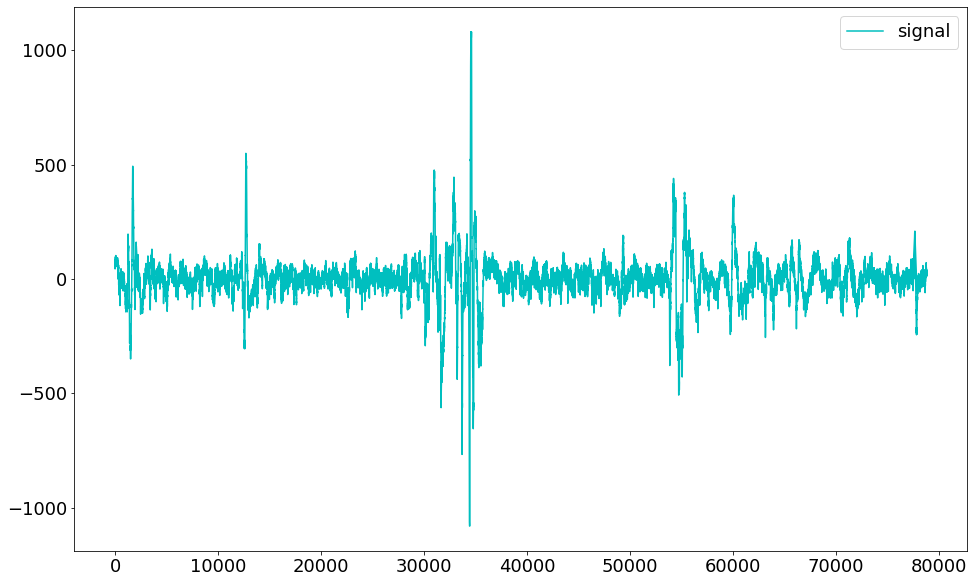

In [38]:
# baca file signal
dataAutis = load_data("/content/drive/MyDrive/U S K/Semester 5/Pengolahan SinyaL Digital/EEG/Nour_Autism_2_10_2011S001R02.dat")
# transformasikan signal ke FFT
autis, autis_abs = FFT(dataAutis[15])
# visualisasikan signal
plotSignal(dataAutis[15])

#Data diubah ke domain frekuensi

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


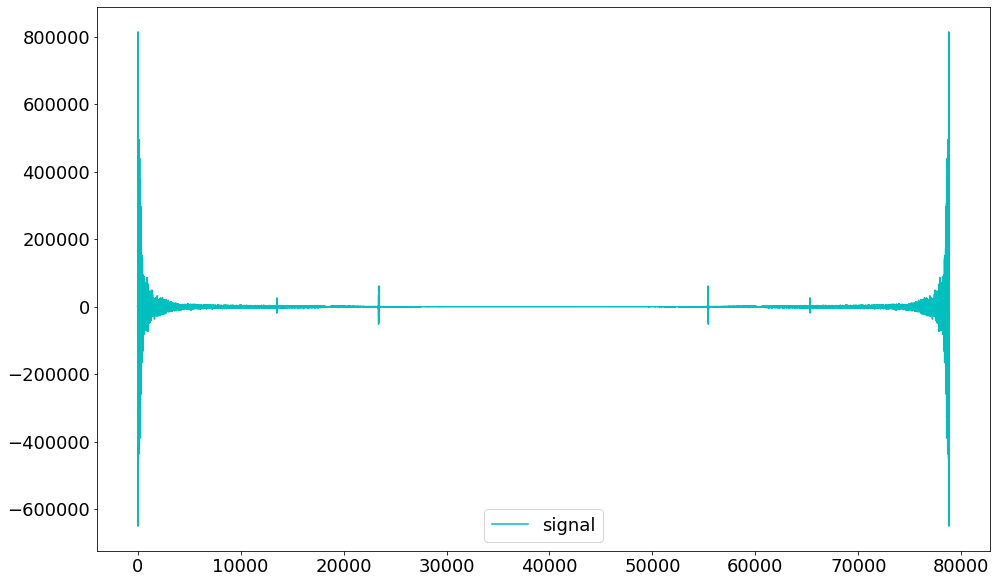

In [39]:
# visualisasikan sinyal
plotSignal(autis)

#Data Difilter


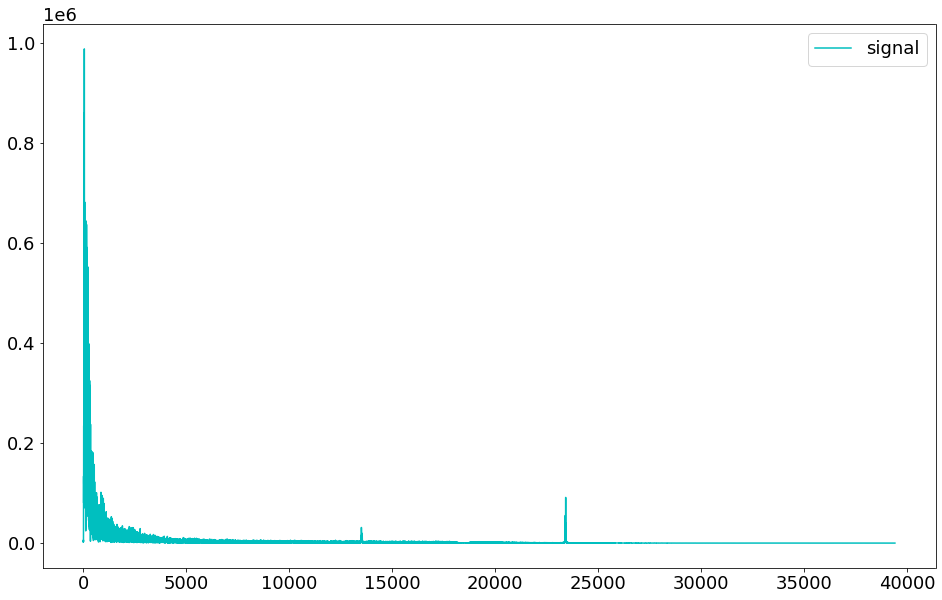

In [40]:
# visualisasikan sinyal
plotSignal(autis_abs)

#Data diubah ke kembali ke domain waktu dan Difilter

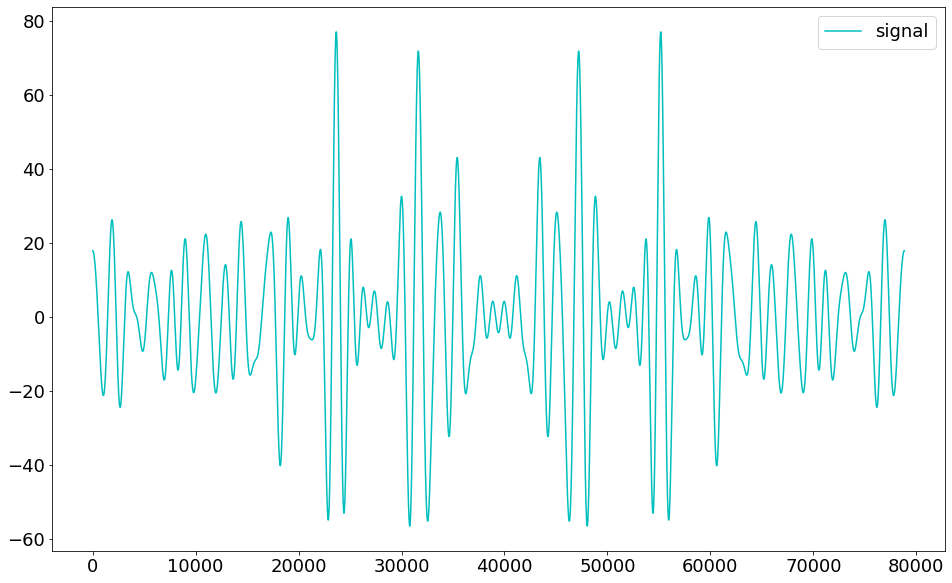

In [41]:
# transformasikan menggunakan IFFT
autis = IFFT(autis, autis_abs)
# visualisasikan sinyal
plotSignal(autis)

#DATA NORMAL

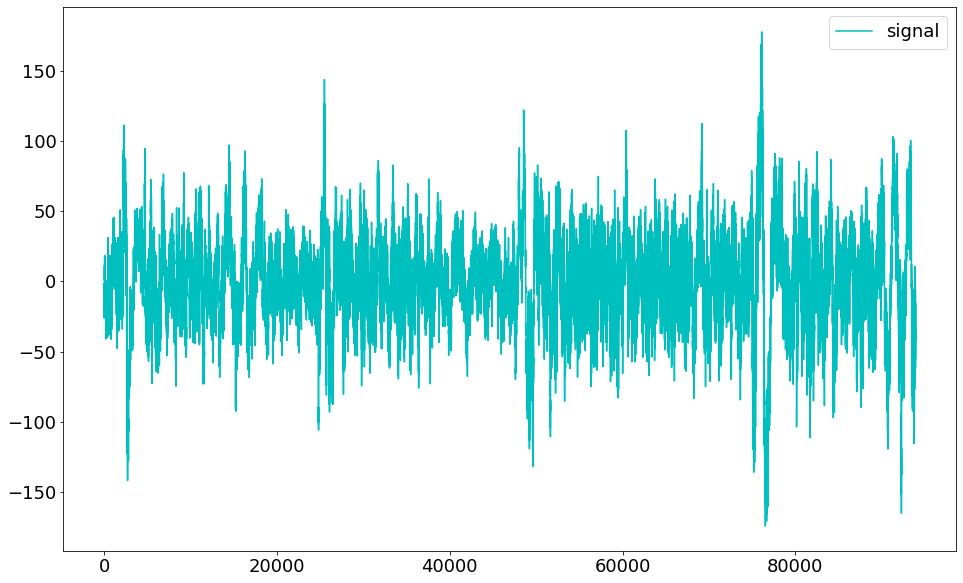

In [42]:
# baca file signal
dataNormal = load_data("/content/drive/MyDrive/U S K/Semester 5/Pengolahan SinyaL Digital/EEG/Amer_Normal_5_5_2011S001R02.dat.dat")
# transformasikan signal ke FFT
normal, normal_abs = FFT(dataNormal[15])
# visualisasikan signal
plotSignal(dataNormal[15])

# Diubah Ke Domain Frekuensi

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1317: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


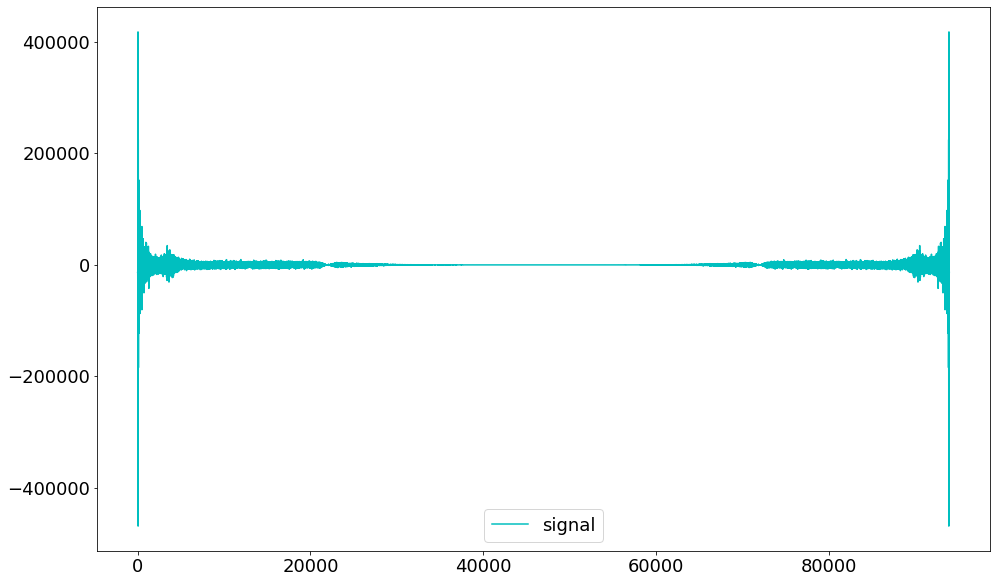

In [43]:
# visualisasikan sinyal
plotSignal(normal)

#Data Difilter

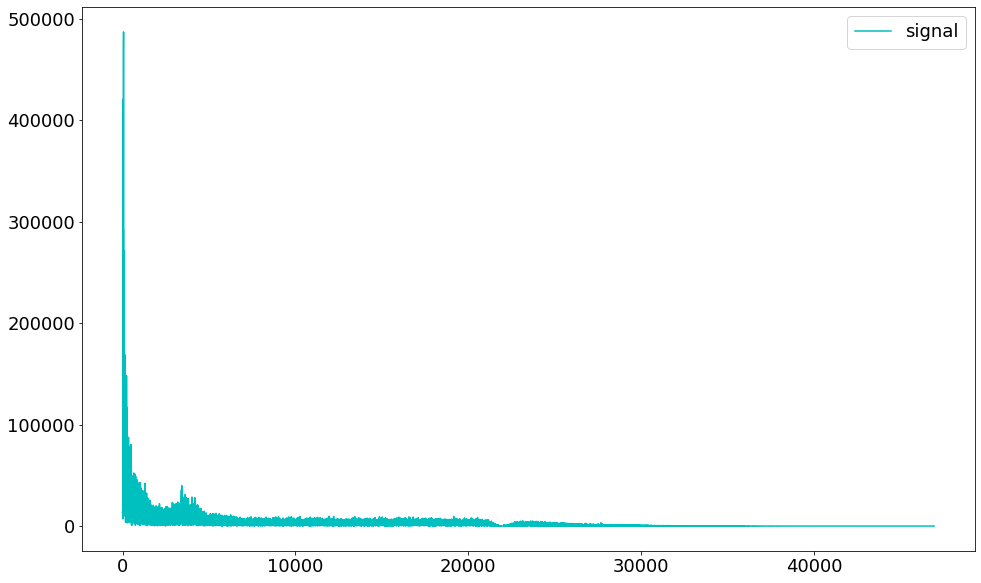

In [44]:
# visualisasikan sinyal
plotSignal(normal_abs)

# Diubah ke domain waktu

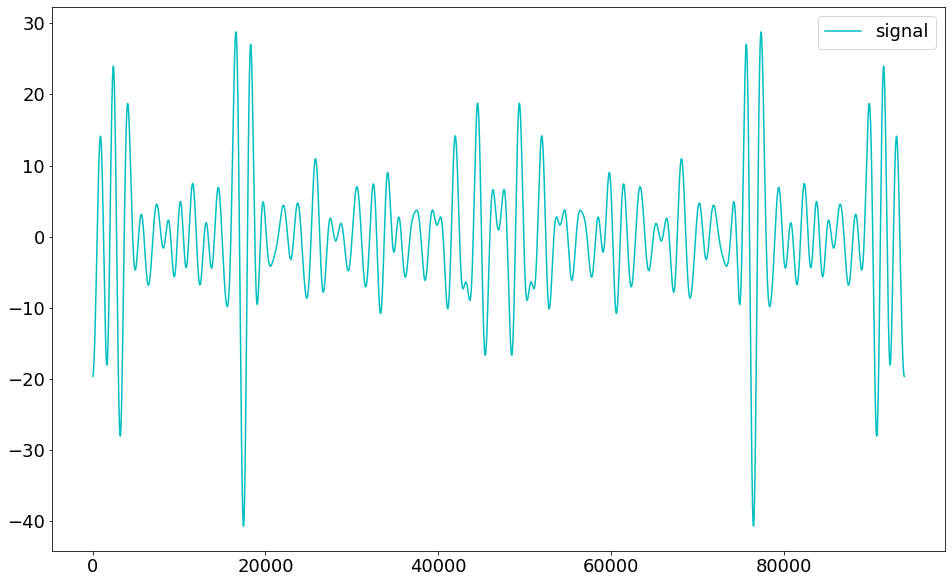

In [45]:
# transformasikan menggunakan IFFT
normal = IFFT(normal, normal_abs)
# visualisasikan sinyal
plotSignal(normal)

#Perbandingan Dua Sinyal EEG Mentah antara AUTIS dan Normal 

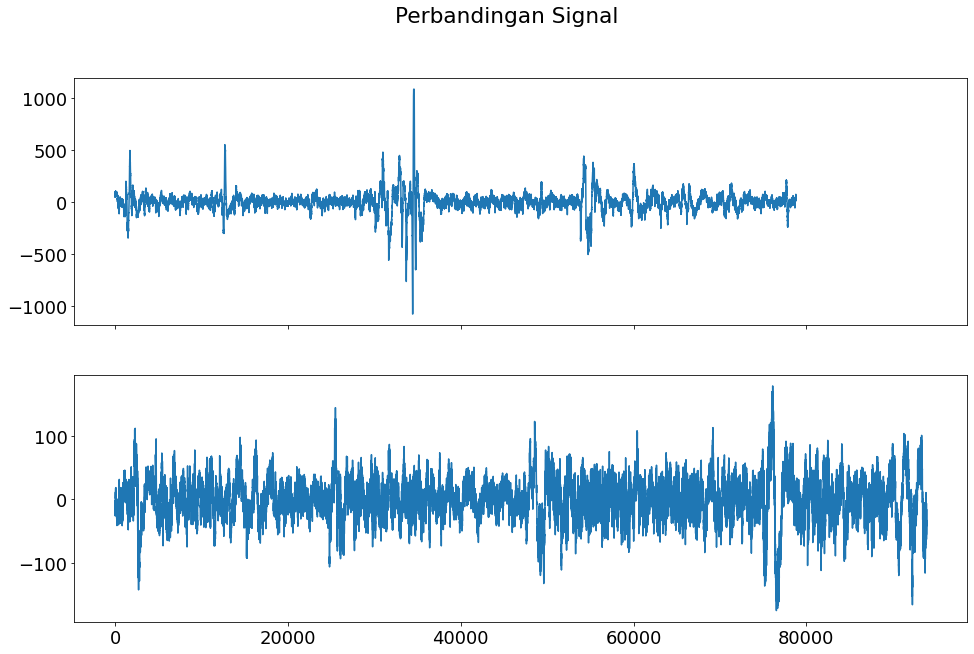

In [46]:
# visualisasi dua sinyal mentah
plotDuaSignal(dataAutis[15], dataNormal[15])

#Perbandingan dua sinyal hasil Filter FFT AUTIS dan Normal

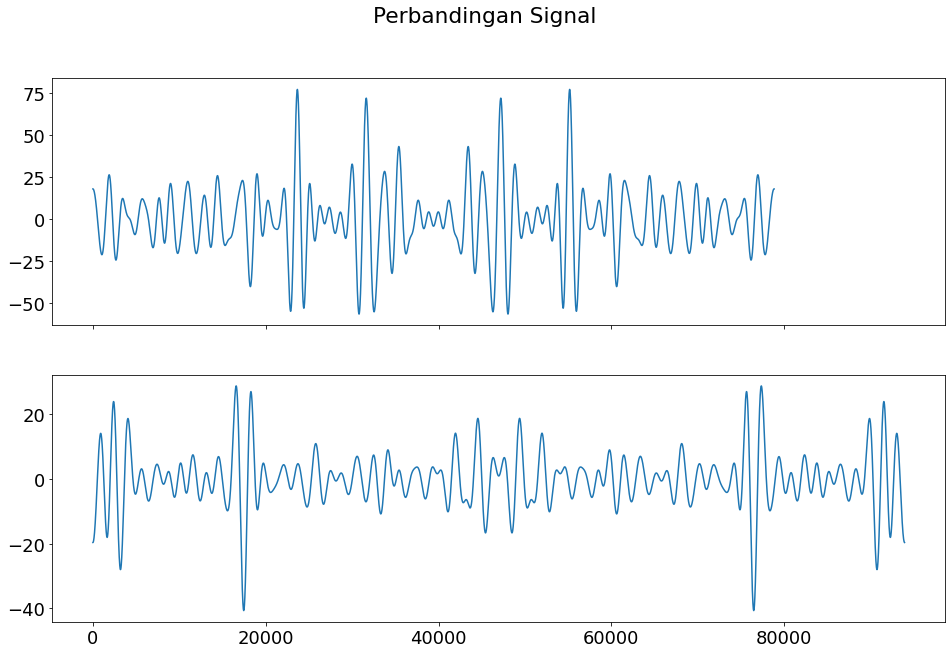

In [47]:
plotDuaSignal(autis, normal)